---

#  Mplfinance Used To Plot MACD Histogram

---

### What is MACD Histogram
The MACD histogram is a technical analysis tool that is used to measure the momentum and strength of a financial instrument's price movement. MACD stands for Moving Average Convergence Divergence. It is derived from the MACD line, which is calculated by subtracting the 26-day exponential moving average (EMA) from the 12-day EMA.

The MACD histogram represents the difference between the MACD line and its signal line, which is a 9-day EMA of the MACD line. It consists of vertical bars that oscillate above or below the zero line, also known as the centerline.

---

### mplfinance 'yahoo' styles was used to customize:
- Type of Plot Use `candle`
- MACD Histogram Build With Two Lines MACD Line, Signal Line and Histogram
- Background, Grid, and Figure Colors
- Grid style
- Y-Axis On The Right or Left
- Matplotlib Defaults
- Histogram
- Alpha
- Color
#### The simplest way to do this is to choose one of the `add_plot` that come packaged with `mplfinance`
#### but, as we see below, it is also possible to customize your own `mplfinance styles`.
#### Also Other Plot Type Can Be Used

---

In [1]:
import pandas as pd
import mplfinance as mpf

In [2]:
# This allows multiple outputs from a single jupyter notebook cell:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

### Read in daily data for the S&P 500 from November of 2019 

In [3]:
idf = pd.read_csv('../data/yahoofinance-INTC-19950101-20040412.csv',index_col=0,parse_dates=True).tail(200)

df = idf.copy()
df.index.name = 'Date'
df.shape
df.head(2)
df.tail(2)

(200, 6)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2003-06-25,20.530001,20.83,19.99,20.040001,13.693501,61250600
2003-06-26,20.299999,20.76,20.15,20.629999,14.096654,52904900


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2004-04-07,28.08,28.129999,27.480000,27.620001,18.923342,72680200
2004-04-08,28.08,28.139999,27.200001,27.370001,18.752058,71791400


--- 
**The MACD histogram is calculated as the MACD indicator minus the signal line. Observe that:**

- When MACD is above the signal line then the histogram is positive.
- When MACD is below the signal line then the histogram is negative.
- When the gap between the MACD and its signal line is widest then the histogram registers its highest (or lowest) readings.
- The histogram is at zero when MACD and the signal line cross (the signal for trading with the MACD).
- The histogram turns back towards the zero line when MACD and the signal line converge, well in advance of them actually crossing.


- **Here is Following Calculation:**
---

In [4]:
#Get the 26-day EMA of the closing price
k = df['Close'].ewm(span=12, adjust=False, min_periods=12).mean()

#Get the 12-day EMA of the closing price
d = df['Close'].ewm(span=26, adjust=False, min_periods=26).mean()

#Subtract the 26-day EMA from the 12-Day EMA to get the MACD
macd = k - d

#Get the 9-Day EMA of the MACD for the Trigger line
macd_s = macd.ewm(span=9, adjust=False, min_periods=9).mean()

#Calculate the difference between the MACD - Trigger for the Convergence/Divergence value
macd_h = macd - macd_s
#Add all of our new values for the MACD to the dataframe
df['MACD_12_26_9'] = df.index.map(macd)
df['MACDh_12_26_9'] = df.index.map(macd_h)
df['MACDs_12_26_9'] = df.index.map(macd_s)


In [5]:
#Generating Colors For Histogram
def gen_macd_color(df):
    macd_color = []
    macd_color.clear()
    for i in range (0,len(df["MACDh_12_26_9"])):
        if df["MACDh_12_26_9"][i] >= 0 and df["MACDh_12_26_9"][i-1] < df["MACDh_12_26_9"][i]:
            macd_color.append('#26A69A')
            #print(i,'green')
        elif df["MACDh_12_26_9"][i] >= 0 and df["MACDh_12_26_9"][i-1] > df["MACDh_12_26_9"][i]:
            macd_color.append('#B2DFDB')
            #print(i,'faint green')
        elif df["MACDh_12_26_9"][i] < 0 and df["MACDh_12_26_9"][i-1] > df["MACDh_12_26_9"][i] :
            #print(i,'red')
            macd_color.append('#FF5252')
        elif df["MACDh_12_26_9"][i] < 0 and df["MACDh_12_26_9"][i-1] < df["MACDh_12_26_9"][i] :
            #print(i,'faint red')
            macd_color.append('#FFCDD2')
        else:
            macd_color.append('#000000')
            #print(i,'no')
    return macd_color

In [6]:
macd = df[['MACD_12_26_9']]
histogram = df[['MACDh_12_26_9']]
signal = df[['MACDs_12_26_9']]

In [7]:
macd_color = gen_macd_color(df)

---

Let's say we want to plot the Ichimoku Cloud along with the basic OHLCV plot.  

We Use `make_addplot()` to create the addplot dict, and pass that into the plot() function:

We Use `Color` To Define Line Colors

We Use `alpha` To Define Depth Line Color

We Use `Panel` To Define MACD with Histogram

We Usr `Histogram` For MACD Histogram

---

In [8]:
apds = [
    mpf.make_addplot(macd,color='#2962FF', panel=1),
    mpf.make_addplot(signal,color='#FF6D00', panel=1),
    mpf.make_addplot(histogram,type='bar',width=0.7,panel=1, color=macd_color,alpha=1,secondary_y=True),
]

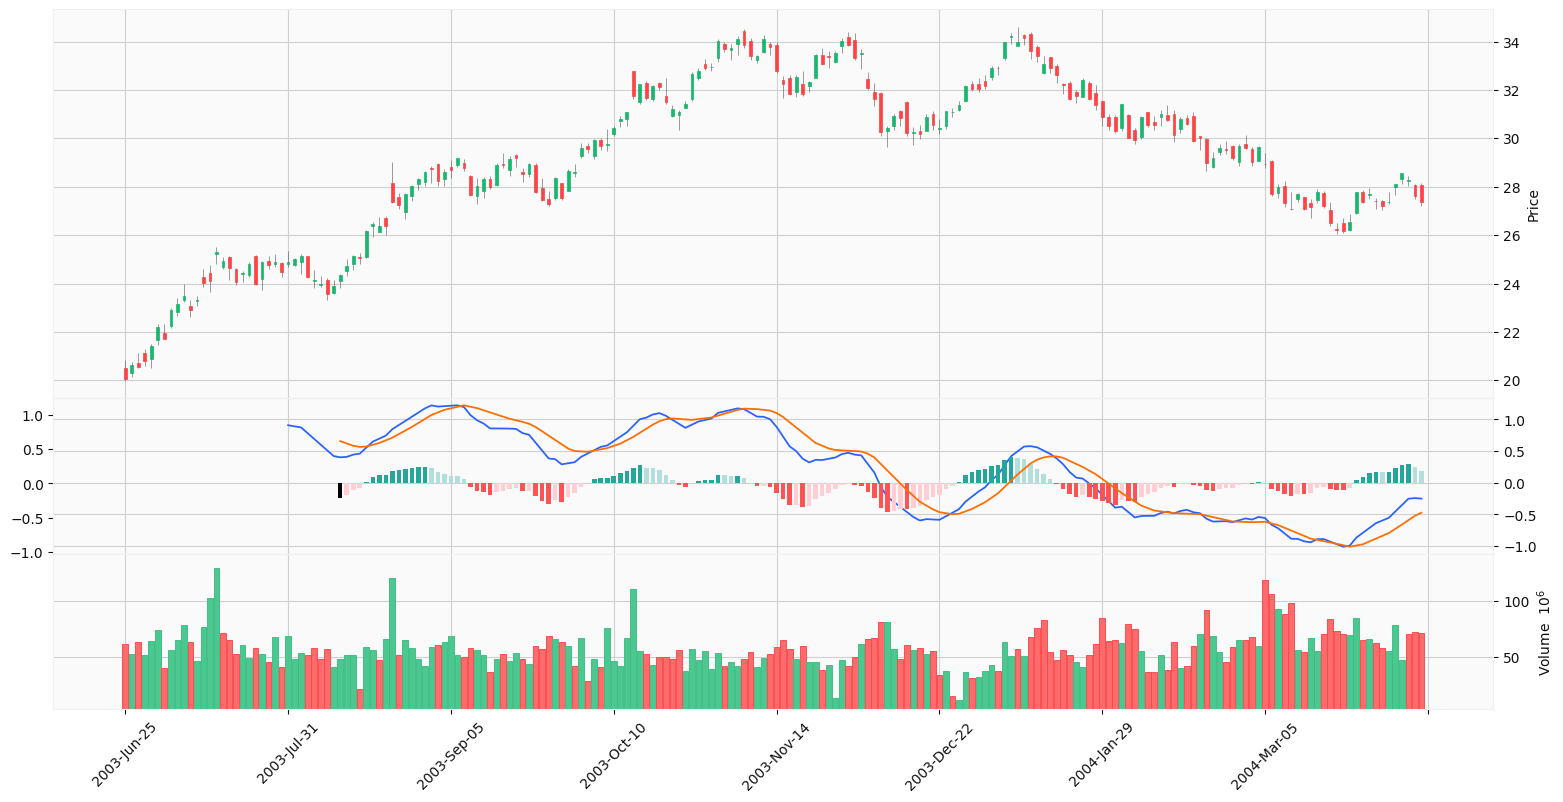

In [9]:
mpf.plot(
    df,
    volume=True,
    type="candle", 
    style="yahoo",
    addplot=apds,
    volume_panel=2,
    figsize=(20,10)
    )